In [1]:
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src import CSVReader, DataProcessor

In [2]:
reader = CSVReader('dataset.csv')
reader.load_data()
df = reader.get_dataframe()

Data loaded successfully from dataset.csv


In [3]:
df.head()

,ip_address,marketing_channel,purchase,state,time_spent_seconds
0,149.18.157.125,Category A,NaN,Wyoming,1745.0
1,108.29.170.186,Category C,NaN,Maryland,953.0
2,53.57.236.159,Category D,NaN,Nebraska,1196.0
3,106.136.105.81,Category A,NaN,Michigan,863.0
4,168.251.246.107,Category A,61.95,Florida,128.0


In [4]:
dp = DataProcessor(df)
PLOTS_DIR = 'analysis'

### Outliers

From the statistical summary below we can see that our numerical columns don't really appear to have any outliers. 

Using the rule of thumb of considering outliers values that are 3 STDs from the mean we have:

- For *purchase*: *max[219] < mean[117] + 3 * std [60]* (the min value is also within range)
- For *time_spend_seconds*: *max[1798] < mean[920] + 3 * std[502]*

In [5]:
dp.statistical_summary()

,purchase,time_spent_seconds
count,461.000000,809.000000
mean,117.371996,920.478368
std,60.726165,502.090252
min,11.190000,11.000000
25%,65.370000,509.000000
50%,119.860000,926.000000
75%,169.340000,1357.000000
max,219.130000,1798.000000


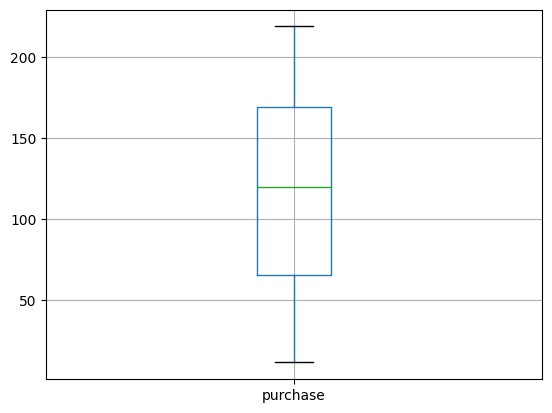

In [6]:
boxplot_purchase = dp.get_boxplot('purchase')
dp.store_plot(boxplot_purchase, osp.join(PLOTS_DIR, 'boxplot_purchase.jpg'))
plt.show()

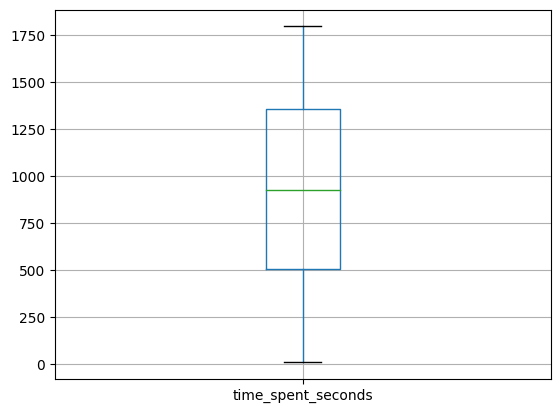

In [7]:
boxplot_time_spent_seconds = dp.get_boxplot('time_spent_seconds')
dp.store_plot(boxplot_time_spent_seconds, osp.join(PLOTS_DIR, 'time_spent_seconds.jpg'))
plt.show()

The two boxplots also confirm that we don't have any outliers since we don't have any datapoints outside the whiskers' range.

### Distribution of Values

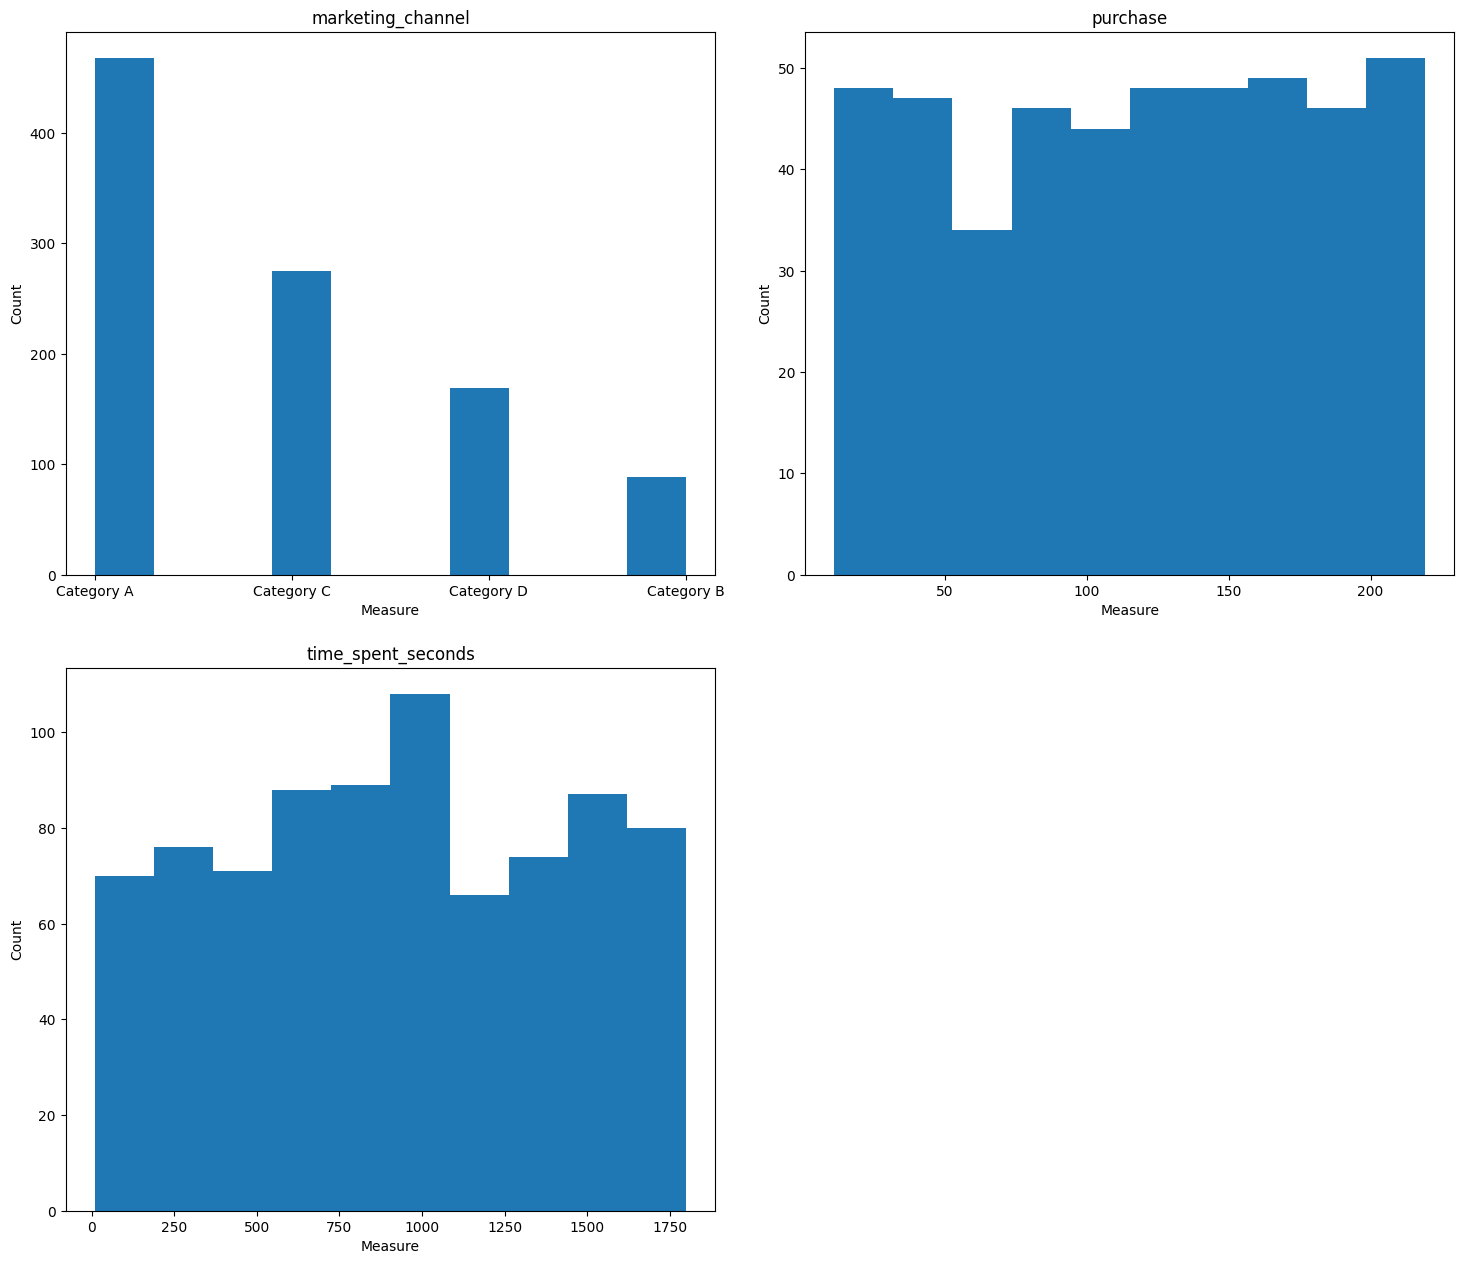

In [8]:
hist = dp.plot_and_save_histograms(['marketing_channel', 'purchase', 'time_spent_seconds'])
dp.store_plot(hist, osp.join(PLOTS_DIR, 'histograms.jpg'))
hist

- The distribution of the data for the marketing channel is havely skewed towards category A, indicating a significant preference for this type of marketing channel.
- The distribution for purchase & time spent seems to be fairly uniform on the other hand, with only a slight peak around 1000 seconds for time spent.

### Key Insights

In [9]:
non_nan_purchases = df['purchase'].notna().sum()
cr = non_nan_purchases / len(df) * 100
print(f'Convertion rate: {cr}%')

Convertion rate: 46.1%


In [10]:
sales_data = df.dropna(subset=['purchase'])
state_sales = sales_data.groupby('state')['purchase'].agg(['sum', 'count'])

highest_amount_state = state_sales['sum'].idxmax()
lowest_amount_state = state_sales['sum'].idxmin()

print(f"Highest Total Amount Sold: {highest_amount_state} with ${state_sales['sum'][highest_amount_state]:.2f}")
print(f"Lowest Total Amount Sold: {lowest_amount_state} with ${state_sales['sum'][lowest_amount_state]:.2f}")

highest_sales_count_state = state_sales['count'].idxmax()
lowest_sales_count_state = state_sales['count'].idxmin()

print(f"Highest Number of Individual Sales: {highest_sales_count_state} with {state_sales['count'][highest_sales_count_state]} sales")
print(f"Lowest Number of Individual Sales: {lowest_sales_count_state} with {state_sales['count'][lowest_sales_count_state]} sales")

Highest Total Amount Sold: Montana with $2423.85
Lowest Total Amount Sold: Connecticut with $200.73
Highest Number of Individual Sales: Montana with 21 sales
Lowest Number of Individual Sales: North Carolina with 2 sales


### Data Processing

In [11]:
dp.add_converted_column()
dp.add_state_abbreviation_column()
dp.add_normalized_column(column='purchase')
dp.add_85_percentile_state()
dp.add_85_percentile_nationality()
dp.fill_in_missing_with_median('time_spent_seconds')

In [12]:
dp.data

,ip_address,marketing_channel,purchase,state,time_spent_seconds,converted,state_abbreviation,purchase_normalized,85th_percentile_state,85th_percentile_national
0,149.18.157.125,Category A,NaN,Wyoming,1745.0,0,WY,NaN,0,0
1,108.29.170.186,Category C,NaN,Maryland,953.0,0,MD,NaN,0,0
2,53.57.236.159,Category D,NaN,Nebraska,1196.0,0,NE,NaN,0,0
3,106.136.105.81,Category A,NaN,Michigan,863.0,0,MI,NaN,0,0
4,168.251.246.107,Category A,61.95,Florida,128.0,1,FL,-0.912654,0,0
...,...,...,...,...,...,...,...,...,...,...
995,52.211.198.5,Category A,NaN,Missouri,232.0,0,MO,NaN,0,0
996,67.251.77.3,Category A,169.64,South Dakota,301.0,1,SD,0.860716,0,0
997,40.38.8.84,Category A,NaN,Missouri,1030.0,0,MO,NaN,0,0
998,187.73.203.76,Category A,136.28,North Dakota,1626.0,1,ND,0.311365,1,0
